## **HALF ADDER**

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector


**TRUTH TABLE OF HALF ADDER**

In [2]:
def half_adder_truth_table():
    print("\nTruth Table for Half Adder:")
    print("A    B    |   Sum (S)   Carry (C)")
    for a in [0, 1]:
        for b in [0, 1]:    
            s = a ^ b  # Sum (XOR)
            c = a & b  # Carry (AND)
            print(f"{a}    {b}    |   {s}         {c}")

# Call the function to print the truth table
half_adder_truth_table()


Truth Table for Half Adder:
A    B    |   Sum (S)   Carry (C)
0    0    |   0         0
0    1    |   1         0
1    0    |   1         0
1    1    |   0         1


### **Quantum Half Adder Implementation**

#### Step 1: Representing Inputs
- **q0** and **q1**: Input qubits representing the two bits being added.

- **q2**: Sum qubit, initialized to 0, which will hold the sum bit.

- **q3**: Carry qubit, initialized to 0, which will hold the carry bit.

Initial state:
 ```
|q0, q1, q2, q3⟩ = |0,0,0,0⟩
 ```

#### Step 2: Apply X Gates to Set Inputs

To represent adding **1 + 1**, set **q0** and **q1** to 1 using **X gates**.

New state:
 ```
|q0, q1, q2, q3⟩ = |1,1,0,0⟩

 ```
#### Step 3: Calculate the Sum with CNOT Gates

The sum is calculated using two **CNOT gates**:

1. Apply **CNOT gate** with **q0 as control** and **q2 as target** (computing the sum bit).

2. Apply **CNOT gate** with **q1 as control** and **q2 as target** (finalizing the sum bit).

The first **CNOT gate** flips **q2** if **q0 = 1**.

The second **CNOT gate** flips **q2** if **q1 = 1**.


After the two CNOT gates, the state changes as follows:

- State before CNOT1 (with **q0 = 1, q1 = 1, q2 = 0, q3 = 0**):
 ```
|1,1,0,0⟩
 ```

- State after CNOT1 (flipping **q2**):
 ```
|1,1,1,0⟩

 ```
- State before CNOT2 (with **q0 = 1, q1 = 1, q2 = 1, q3 = 0**):
 ```
|1,1,1,0⟩
 ```

- State after CNOT2 (flipping **q2** again):
 ```
|1,1,0,0⟩
 ```

At this point, **q2** holds the sum bit, which is correctly computed as **0**.

#### Step 4: Calculate the Carry with a Toffoli Gate

Apply a **Toffoli gate** (controlled-controlled-NOT gate) to compute the carry:

- **q0** and **q1** are the control qubits.

- **q3** is the target qubit, where the carry bit will be stored.

The **Toffoli gate** flips **q3** only if both **q0 = 1** and **q1 = 1**.

- Input state before Toffoli:
 ```
|1,1,0,0⟩
 ```

- Output state after Toffoli:
 ```
|1,1,0,1⟩
 ```

This sets the carry bit **q3 = 1**.

#### Step 5: Measurement

- The sum is stored in **q2**.

- The carry is stored in **q3**.

Final binary result:

Sum: q2 = 0
Carry: q3 = 1


**Final output:** `10`

**IMPLEMENTATION OF QUANTUM CIRCUIT - HALF ADDER**

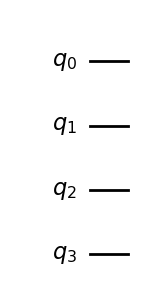

In [3]:
qc = QuantumCircuit(4)
qc.draw('mpl')

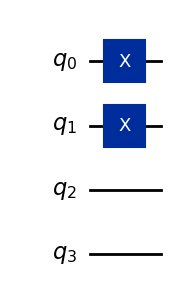

In [4]:
# encode inputs in qubits 0 and 1
qc.x(0) 
qc.x(1)
qc.draw('mpl')

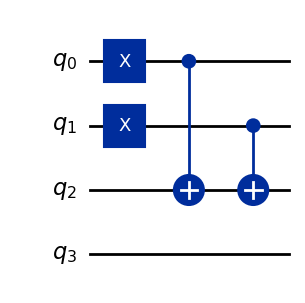

In [5]:
# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)
qc.draw('mpl')

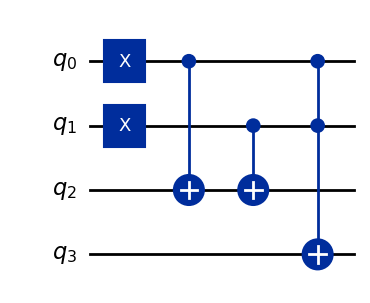

In [6]:
# use ccx to write the AND of the inputs on qubit 3
qc.ccx(0,1,3)
# extract outputs
# qc.measure(2,0) # extract XOR value
# qc.measure(3,1) # extract AND value

qc.draw(output='mpl')

**QUANTUM CIRCUIT OF HALF ADDER WITH MEASURE**

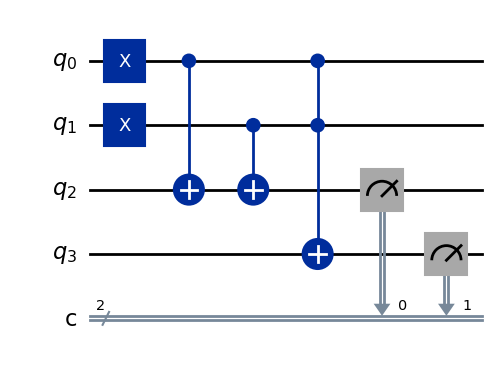

In [7]:
qc1 = QuantumCircuit(4,2)

# encode inputs in qubits 0 and 1
qc1.x(0) 
qc1.x(1)

# use cnots to write the XOR of the inputs on qubit 2
qc1.cx(0,2)
qc1.cx(1,2)

# use ccx to write the AND of the inputs on qubit 3
qc1.ccx(0,1,3)
# extract outputs
qc1.measure(2,0) # extract XOR value
qc1.measure(3,1) # extract AND value

qc1.draw(output='mpl')

**STATE VECTORS**

In [8]:
# Get statevector
statevector = Statevector.from_instruction(qc)
print(statevector)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


**Q-SPHERE**

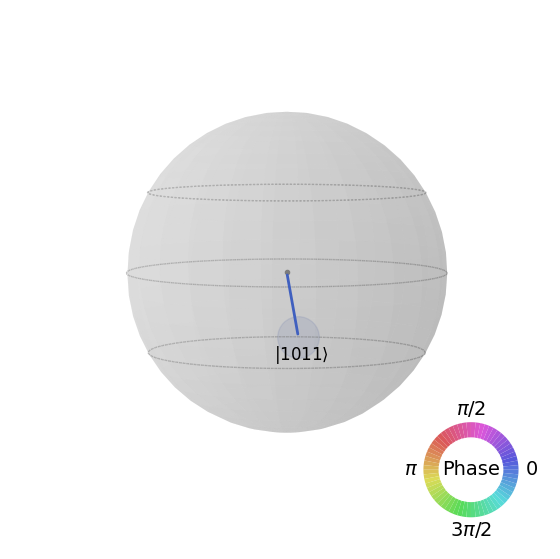

In [9]:
plot_state_qsphere(statevector)

**BLOCH SPHERE**

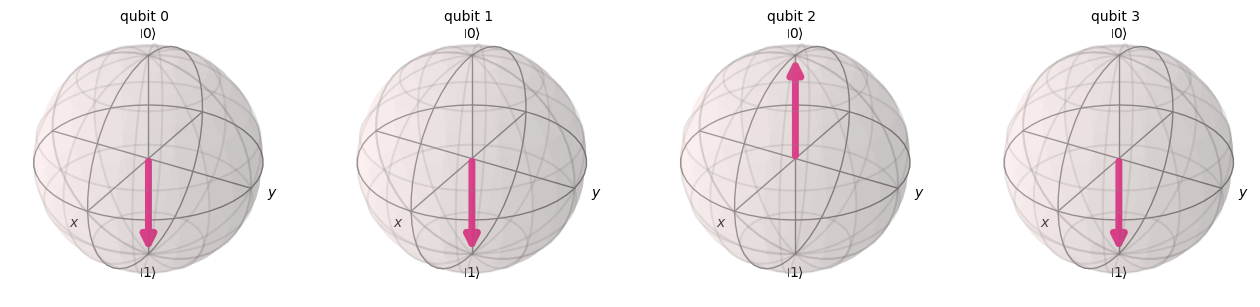

In [10]:
plot_bloch_multivector(statevector)

**HISTOGRAM**

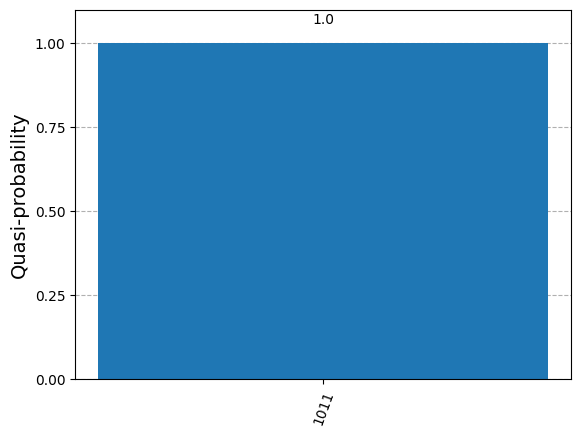

In [11]:
plot_histogram(statevector.probabilities_dict())